# This is the G&M pp 10-18 Sample code.

In [1]:
import sklearn
print('The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.21.2.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [3]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [5]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)

[[-28.2923892   14.32320699]
 [ -3.10779925  -7.97159739]
 [  3.03726756  -3.91331751]]


In [9]:
print(clf.intercept_)

[-17.69763846  -5.80233299  -1.0858013 ]


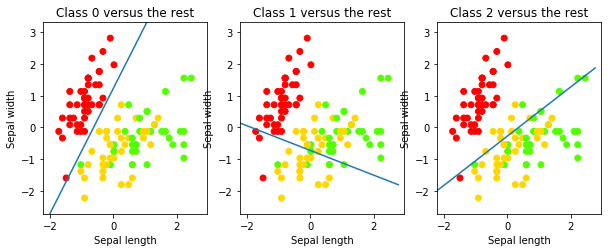

In [24]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [25]:
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


In [26]:
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[19.14679995 -2.56155616 -5.24187091]]


In [27]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.7321428571428571


In [28]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6842105263157895


In [29]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.00      0.00      0.00        11
   virginica       0.62      0.95      0.75        19

    accuracy                           0.68        38
   macro avg       0.54      0.65      0.58        38
weighted avg       0.52      0.68      0.59        38



In [30]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  0 11]
 [ 0  1 18]]


In [31]:
print("My name is Zizheng Zhang")
print("My NetID is: zizheng2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zizheng Zhang
My NetID is: zizheng2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
